Importing the necessary libraries.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import r2_score
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

Question2
Task-1 Dataset Exploration: (a) Load the dataset and display the first few
rows. (b) Plot a scatter plot to visualize the relationship between the TV
marketing budget and sales. Comment on the trend observed in the scatter
plot. (c) Calculate and display basic statistical measures (mean, standard
deviation) for both TV marketing budget and sales.


      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9


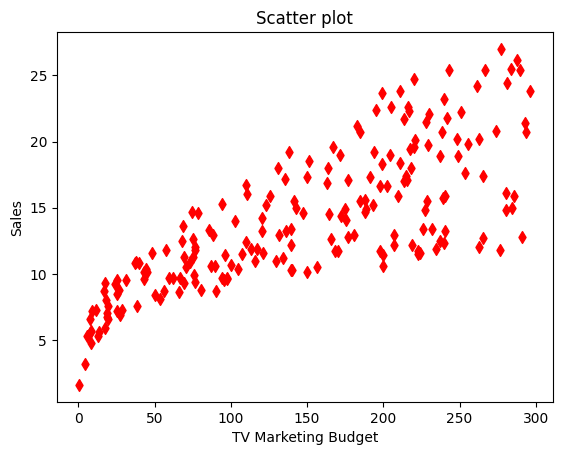

The mean of TV Marketing Budget is :  147.0425
The mean of Sales is :  14.0225
The Standard Deviation of TV Marketing Budget is :  85.85423631490808
The Standard Deviation of Sales is :  5.217456565710478


In [2]:
url = "https://raw.githubusercontent.com/devzohaib/Simple-Linear-Regression/master/tvmarketing.csv"
d=pd.read_csv(url)
print(d.head())

x=d['TV']
y=d["Sales"]
plt.scatter(x,y,c='red',marker='d')
plt.title('Scatter plot')
plt.xlabel('TV Marketing Budget')
plt.ylabel('Sales')
plt.show()

mean1=d['TV'].mean()
mean2=d['Sales'].mean()
sd1=d['TV'].std()
sd2=d['Sales'].std()

print("The mean of TV Marketing Budget is : ",mean1)
print("The mean of Sales is : ",mean2)
print("The Standard Deviation of TV Marketing Budget is : ",sd1)
print("The Standard Deviation of Sales is : ",sd2)

Task-2: Data Preprocessing: (a) Check for any missing values in the dataset and handle them appropriately.
(b) Normalize the TV marketing budget and sales columns if needed.
(c) Split the dataset into training and testing sets using 80-20 split.

In [3]:
#part (a)
d.info()

# #part (b)
# Normalizing the data
sales_min = np.min(d['Sales'])
sales_max = np.max(d['Sales'])
d['Sales'] = (d['Sales'] - sales_min) / (sales_max - sales_min)
d['TV'] = d['TV'] / 100
print(d.head())

#part (c)
X_train, X_test, y_train, y_test = train_test_split(d['TV'], d['Sales'], test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB
      TV     Sales
0  2.301  0.807087
1  0.445  0.346457
2  0.172  0.303150
3  1.515  0.665354
4  1.808  0.444882
X_train shape: (160,)
X_test shape: (40,)
y_train shape: (160,)
y_test shape: (40,)


Task-3: Linear Regression Implementation: (a) Implement the hypothesis
function for linear regression(y = w1x + w0) using Gradient Descent. Use
mean squared error (MSE) cost function. (b) Plot the regression line on the
scatter plot from Task-1.

m 0.19074711343123135, b 0.20334617485497655,  iteration 4999
m 0.20618668380761496, b 0.1967703807966552,  iteration 4999


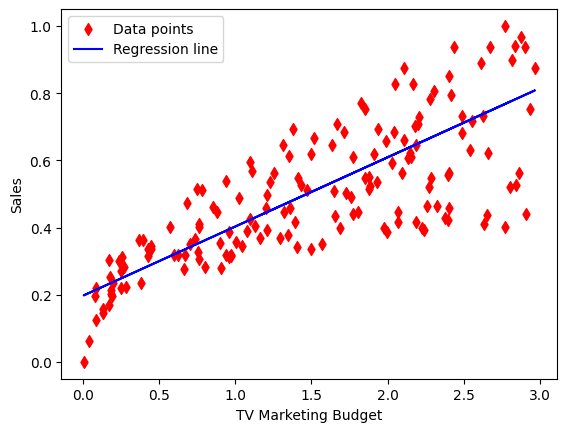

In [4]:
def g_d(x,y):
  m_curr=b_curr=0
  iterations=5000
  n = len(x)
  alpha=0.001
  for i in range(iterations):
      y_predicted = m_curr * x + b_curr
     # cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
      md = -(2/n)*sum(x*(y-y_predicted))
      bd = -(2/n)*sum(y-y_predicted)
      m_curr -= alpha * md
      b_curr -= alpha * bd
  print ("m {}, b {},  iteration {}".format(m_curr,b_curr, i))
  return m_curr,b_curr,y_predicted
# x=d["TV"]
# y=d["Sales"]
m,b,y_predicted=g_d(X_train,y_train)
m,b,y_predicted_t=g_d(X_test,y_test)


# Plotting the data and the learned regression line
plt.scatter(X_train, y_train, label='Data points',color="red",marker='d')
plt.plot(X_train, b + m * np.array(X_train), color='blue', label='Regression line')
plt.xlabel('TV Marketing Budget')
plt.ylabel('Sales')
plt.legend()
plt.show()



Task-4: Evaluation: On test split compute mean square error and absolute
error. (2 Points)

In [5]:
mse_test = np.mean((y_test - y_predicted_t)**2)
print("mean squared error on test data" ,mse_test)
mae_test = np.mean(np.abs(y_test - y_predicted_t))
print("Absolute error on test data",mae_test)

mean squared error on test data 0.015372613459096879
Absolute error on test data 0.09224840878882747


Question-3 (Linear Regression-2) Now repeat all the tasks in Problem-2 for predicting
house rent on the Boston Housing dataset. Note that in this dataset, you need to perform multivariate linear regression. (20 Points).


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  



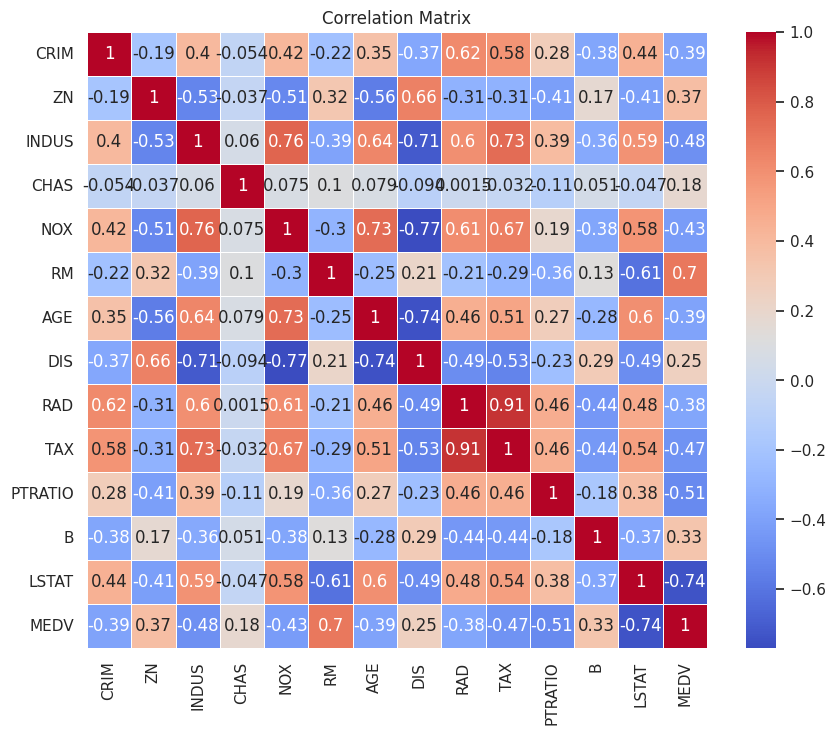


CRIM:
CRIM_mean: 3.6119
CRIM_std: 8.5458

ZN:
ZN_mean: 11.2119
ZN_std: 22.9211

INDUS:
INDUS_mean: 11.0840
INDUS_std: 6.6992

CHAS:
CHAS_mean: 0.0700
CHAS_std: 0.2502

NOX:
NOX_mean: 0.5547
NOX_std: 0.1159

RM:
RM_mean: 6.2846
RM_std: 0.7026

AGE:
AGE_mean: 68.5185
AGE_std: 27.4395

DIS:
DIS_mean: 3.7950
DIS_std: 2.1057

RAD:
RAD_mean: 9.5494
RAD_std: 8.7073

TAX:
TAX_mean: 408.2372
TAX_std: 168.5371

PTRATIO:
PTRATIO_mean: 18.4555
PTRATIO_std: 2.1649

B:
B_mean: 356.6740
B_std: 91.2949

LSTAT:
LSTAT_mean: 12.7154
LSTAT_std: 7.0127

MEDV:
MEDV_mean: 22.5328
MEDV_std: 9.1971



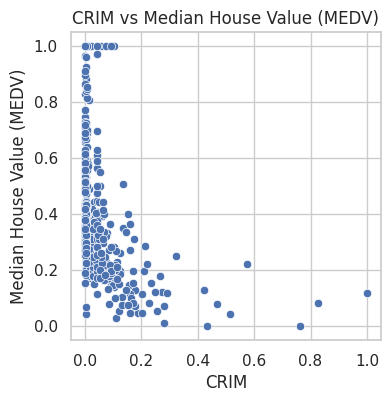

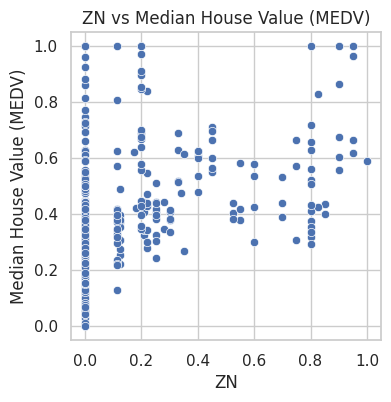

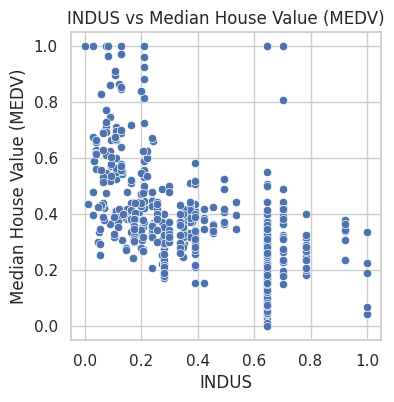

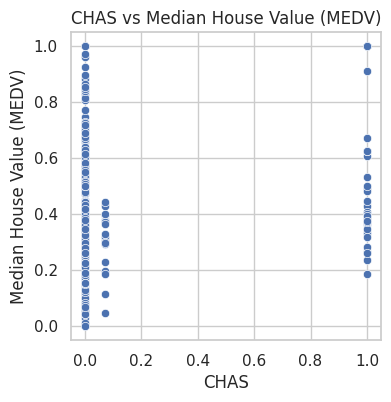

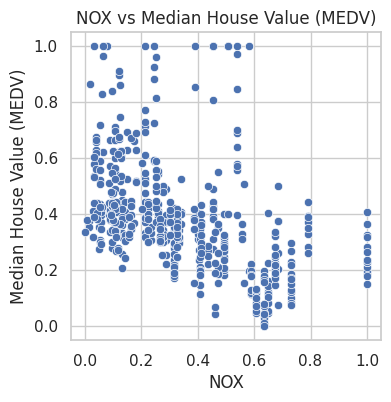

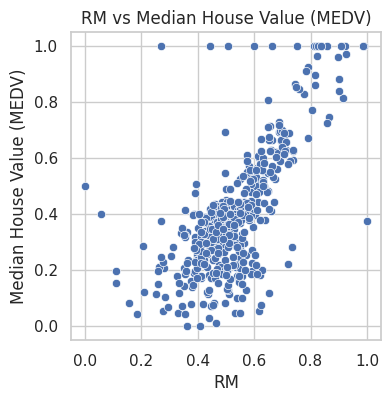

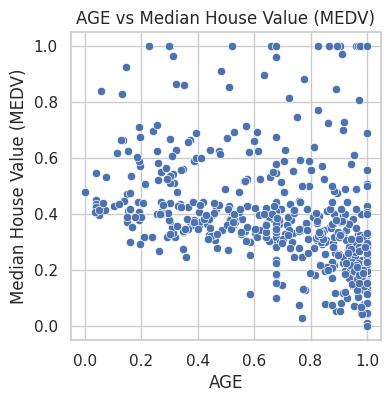

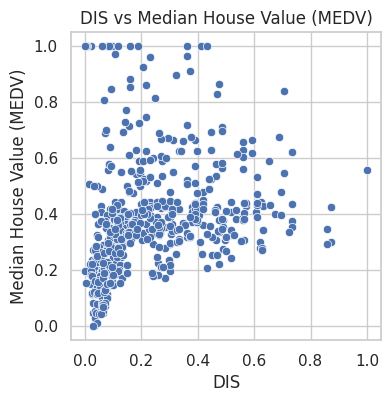

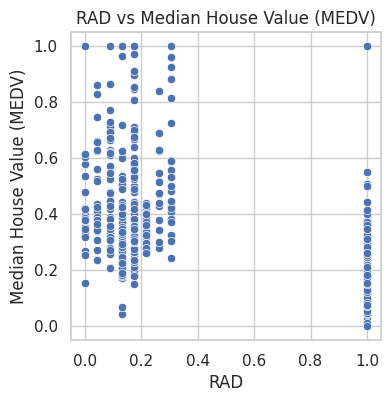

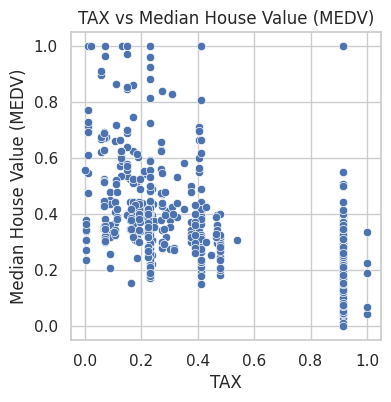

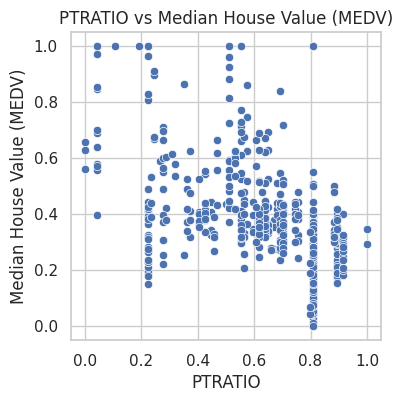

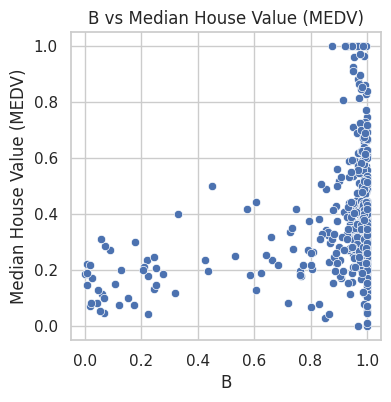

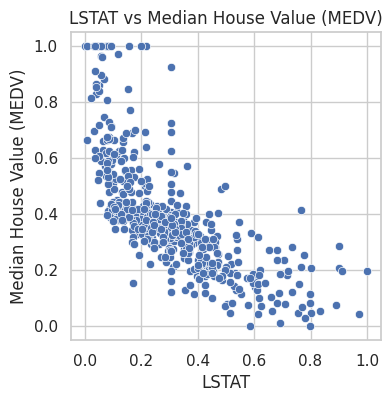

Epoch 0, MSE: 0.1993
Epoch 100, MSE: 0.0333
Epoch 200, MSE: 0.0267
Epoch 300, MSE: 0.0237
Epoch 400, MSE: 0.0219
Epoch 500, MSE: 0.0205
Epoch 600, MSE: 0.0193
Epoch 700, MSE: 0.0183
Epoch 800, MSE: 0.0175
Epoch 900, MSE: 0.0168
Final Epoch 1000, MSE: 0.0162
Mean Squared Error on Test Set: 0.0148
Absolute Error on Test Set: 0.0807
R2 Score on Test Set: 0.5903


In [17]:
#Loading the dataset
dataframe = pd.read_csv('/content/drive/MyDrive/bostonHousingData.csv')


print(dataframe.head())
print()

corr_mat = dataframe.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
print()

#Handling null values
dataframe.fillna(dataframe.select_dtypes(include='float').mean(), inplace=True)
dataframe.fillna(dataframe.select_dtypes(include='int').median(), inplace=True)

for col in dataframe.columns:
  print(f"{col}:")
  print(f"{col}_mean: {dataframe[col].mean():.4f}")
  print(f"{col}_std: {dataframe[col].std():.4f}")
  print()

#Normalisation
for col in dataframe.columns:
  lower = dataframe[col].min()
  upper = dataframe[col].max()
  dataframe[col] = (dataframe[col] - lower) / (upper - lower)

sns.set(style="whitegrid")

#Initial Visualisation of dataset
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
for feature in features:
  plt.figure(figsize=(4, 4))
  sns.scatterplot(x=feature, y='MEDV', data=dataframe)
  plt.title(f'{feature} vs Median House Value (MEDV)')
  plt.xlabel(feature)
  plt.ylabel('Median House Value (MEDV)')
  plt.show()


X = dataframe.drop('MEDV', axis=1)
y = dataframe['MEDV']

#Splitting dataset
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)


def f(X, y, lr=0.01, epochs=1000):
  w = np.zeros(X.shape[1])
  b = 0

  for e in range(epochs):
      yp = np.dot(X, w) + b
      err = yp - y
      w -= lr * (2 / len(X)) * np.dot(X.T, err)
      b -= lr * (2 / len(X)) * np.sum(err)

      if e % 100 == 0:
          mse = np.mean(err ** 2)
          print(f'Epoch {e}, MSE: {mse:.4f}')

  mse_final = np.mean(err ** 2)
  print(f'Final Epoch {epochs}, MSE: {mse_final:.4f}')

  return w, b

def p(X, w, b):
  return np.dot(X, w) + b

X_tr_np = np.c_[np.ones(X_tr.shape[0]), X_tr.values]
X_te_np = np.c_[np.ones(X_te.shape[0]), X_te.values]

w, b = f(X_tr_np, y_tr.values)
y_pred = p(X_te_np, w, b)


#Evaluation
print(f'Mean Squared Error on Test Set: {np.mean((y_te.values - y_pred) ** 2):.4f}')
print(f'Absolute Error on Test Set: {np.mean(np.abs(y_te.values - y_pred)):.4f}')
print(f'R2 Score on Test Set: {r2_score(y_te.values, y_pred):.4f}')

Question-1

Shape of X_train: (694, 7)
Shape of y_train: (694,)
Shape of X_test: (195, 7)
Shape of y_test: (195,)
Predicted values:
[0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1]
Confusion Matrix:
{0: {0: 104, 1: 12}, 1: {0: 16, 1: 63}}
Accuracy: 85.64102564102564
Classification Report:
{'precision': {0: 0.8666666666666667, 1: 0.84}, 'recall': {0: 0.896551724137931, 1: 0.7974683544303798}, 'f1-score': {0: 0.8813559322033899, 1: 0.8181818181818181}, 'support': {0: 116, 

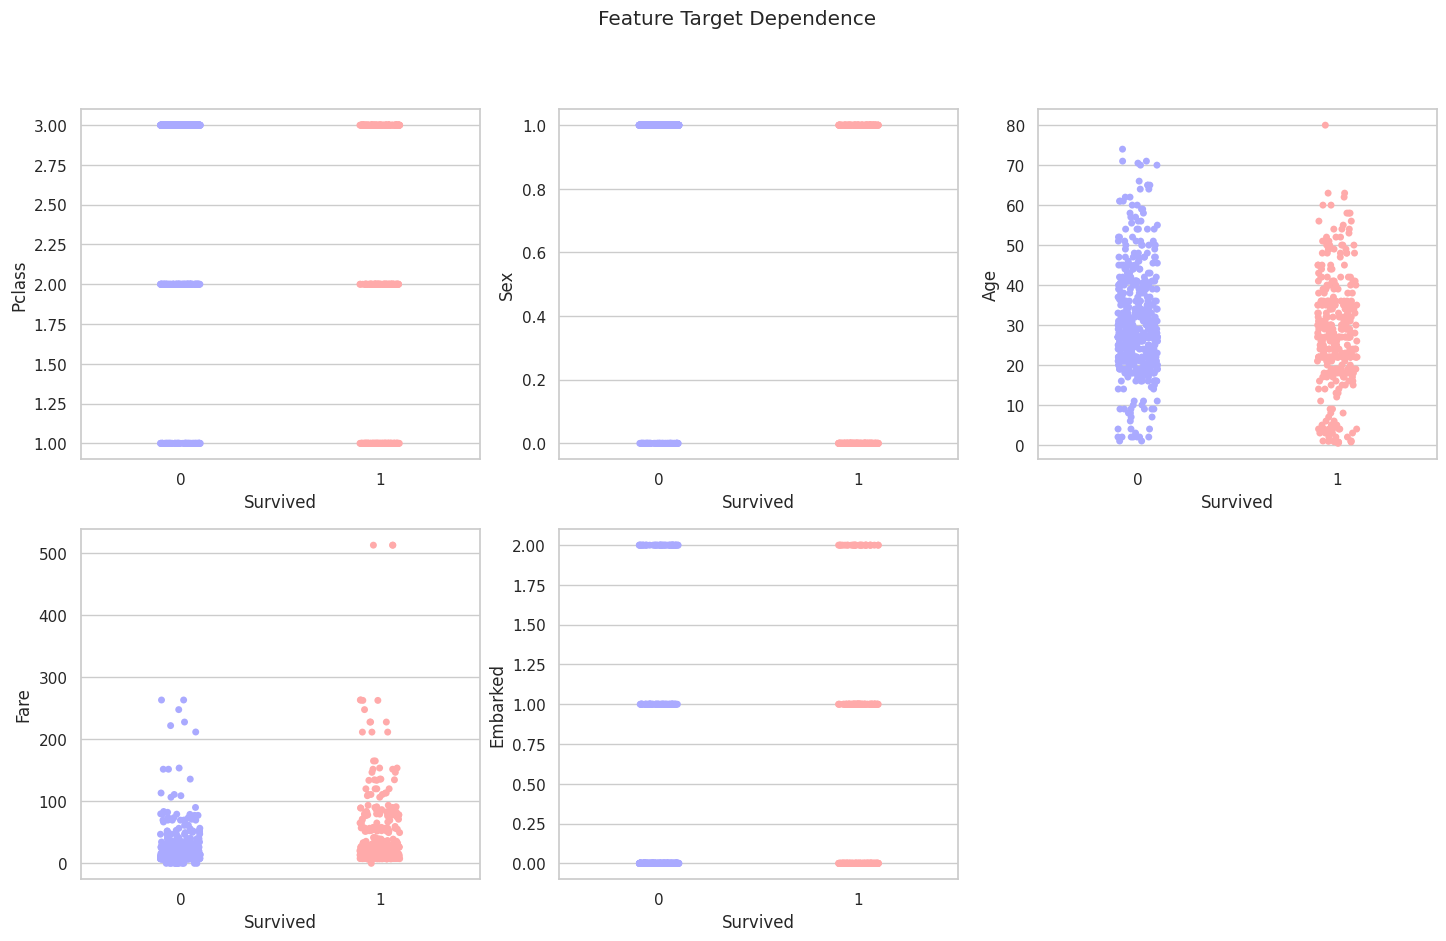

In [43]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

file_path = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(file_path)

# Handling missing values in 'Age' based on specified conditions
for i in range(len(df)):
    if pd.isna(df['Age'][i]):
        if df['Sex'][i] == "female" and df['Pclass'][i] == 1:
            df['Age'][i] = 35
        elif df['Sex'][i] == "female" and df['Pclass'][i] == 2:
            df['Age'][i] = 29
        elif df['Sex'][i] == "female" and df['Pclass'][i] == 3:
            df['Age'][i] = 22
        elif df['Sex'][i] == "male" and df['Pclass'][i] == 1:
            df['Age'][i] = 41
        elif df['Sex'][i] == "male" and df['Pclass'][i] == 2:
            df['Age'][i] = 31
        elif df['Sex'][i] == "male" and df['Pclass'][i] == 3:
            df['Age'][i] = 27

# Dropping unnecessary columns
df = df.drop(columns=['Cabin', 'PassengerId', 'Name', 'Ticket'])

# Handling missing values in 'Embarked' by dropping corresponding rows
df = df.dropna(subset=['Embarked'])

# Encoding 'Sex' column
df['Sex'] = df['Sex'].replace("female", 0).replace("male", 1)

# Encoding 'Embarked' column
df['Embarked'] = df['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})

# Visualizing feature-target relationship
figure, axes = plt.subplots(2, 3, figsize=(17.5, 10))
figure.delaxes(axes[1][2])
figure.suptitle("Feature Target Dependence")

# Custom stripplot function
def custom_stripplot(ax, x, y):
    sns.stripplot(ax=ax, data=df, x=x, y=y, palette="bwr")

custom_stripplot(axes[0, 0], "Survived", "Pclass")
custom_stripplot(axes[0, 1], "Survived", "Sex")
custom_stripplot(axes[0, 2], "Survived", "Age")
custom_stripplot(axes[1, 0], "Survived", "Fare")
custom_stripplot(axes[1, 1], "Survived", "Embarked")

# Feature and target split
X = df.drop(columns=['Survived'])
y = df['Survived']

# Manual train-test split
mask = np.random.rand(len(df)) < 0.8
X_train = X[mask]
y_train = y[mask]
X_test = X[~mask]
y_test = y[~mask]

# Check shape
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)



def confusion_matrix(actual, predicted, classes):
    # Compute the confusion matrix.
    matrix = {class_label: {class_label: 0 for class_label in classes} for class_label in classes}
    for a, p in zip(actual, predicted):
        matrix[a][p] += 1
    return matrix

def accuracy_score(actual, predicted):
    # Compute the accuracy score.
    correct = sum(1 for a, p in zip(actual, predicted) if a == p)
    return correct / len(actual)

def precision(actual, predicted, class_label):
    # Compute precision for a specific class.
    true_positive = sum(1 for a, p in zip(actual, predicted) if a == class_label and p == class_label)
    false_positive = sum(1 for a, p in zip(actual, predicted) if a != class_label and p == class_label)
    return true_positive / (true_positive + false_positive) if (true_positive + false_positive) != 0 else 0

def recall(actual, predicted, class_label):
    # Compute recall for a specific class.
    true_positive = sum(1 for a, p in zip(actual, predicted) if a == class_label and p == class_label)
    false_negative = sum(1 for a, p in zip(actual, predicted) if a == class_label and p != class_label)
    return true_positive / (true_positive + false_negative) if (true_positive + false_negative) != 0 else 0

def f1_score(actual, predicted, class_label):
    # Compute F1-score for a specific class.
    precision_val = precision(actual, predicted, class_label)
    recall_val = recall(actual, predicted, class_label)
    return 2 * (precision_val * recall_val) / (precision_val + recall_val) if (precision_val + recall_val) != 0 else 0

def classification_report(actual, predicted, classes):
    # Generate a classification report.
    report = {'precision': {}, 'recall': {}, 'f1-score': {}, 'support': {}}
    for class_label in classes:
        # Precision
        report['precision'][class_label] = precision(actual, predicted, class_label)
        # Recall
        report['recall'][class_label] = recall(actual, predicted, class_label)
        # F1-score
        report['f1-score'][class_label] = f1_score(actual, predicted, class_label)
        # Support
        report['support'][class_label] = sum(1 for a in actual if a == class_label)
    return report



def calculate_entropy(groups, classes):
    n_instances = sum(len(group) for group in groups)
    entropy = 0.0
    for group in groups:
        size = len(group)
        if size == 0:
            continue
        score = 0.0
        for class_val in classes:
            p = (group.iloc[:, -1] == class_val).sum() / size
            if p != 0:
                score += p * math.log(p, 2)  # Calculate entropy
        entropy -= score * (size / n_instances)
    return entropy

def get_split(df):
    class_values = df.iloc[:, -1].unique()
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    for index in range(len(df.columns) - 1):
        for row in df.itertuples(index=False):
            groups = split(index, row[index], df)
            entropy = calculate_entropy(groups, class_values)
            if entropy < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], entropy, groups
    return {'index': b_index, 'value': b_value, 'groups': b_groups}

def split(index, value, df):
    left = df[df.iloc[:, index] < value]
    right = df[df.iloc[:, index] >= value]
    return left, right

def to_terminal(group):
    return group.iloc[:, -1].mode()[0]

def split_node(node, depth, max_depth, min_samples_leaf):
    left, right = node['groups']
    del node['groups']
    if left.empty or right.empty:
        node['left'] = node['right'] = to_terminal(left.append(right))
        return
    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return
    if len(left) <= min_samples_leaf:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_split(left)
        split_node(node['left'], depth + 1, max_depth, min_samples_leaf)
    if len(right) <= min_samples_leaf:
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_split(right)
        split_node(node['right'], depth + 1, max_depth, min_samples_leaf)

def build_tree(X_train, y_train, depth, max_depth, min_samples_leaf):
    df = pd.DataFrame(X_train)
    df['label'] = y_train
    root = get_split(df)
    split_node(root, depth, max_depth, min_samples_leaf)
    return root

def predict(tree, row):
    if row[tree['index']] < tree['value']:
        if isinstance(tree['left'], dict):
            return predict(tree['left'], row)
        else:
            return tree['left']
    else:
        if isinstance(tree['right'], dict):
            return predict(tree['right'], row)
        else:
            return tree['right']

def decision_tree_fit(X_train, y_train, max_depth=3, min_samples_leaf=5):
    tree = build_tree(X_train, y_train, depth=0, max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    return tree

def decision_tree_predict(tree, X_test):
    predictions = []
    df_test = pd.DataFrame(X_test)
    for row in df_test.itertuples(index=False):
        prediction = predict(tree, row)
        predictions.append(prediction)
    return predictions

# Define functions for evaluation metrics

def confusion_matrix(actual, predicted, classes):
    matrix = {class_label: {class_label: 0 for class_label in classes} for class_label in classes}
    for a, p in zip(actual, predicted):
        matrix[a][p] += 1
    return matrix

def accuracy_score(actual, predicted):
    correct = sum(1 for a, p in zip(actual, predicted) if a == p)
    return correct / len(actual)

def classification_report(actual, predicted, classes):
    report = {'precision': {}, 'recall': {}, 'f1-score': {}, 'support': {}}
    matrix = confusion_matrix(actual, predicted, classes)
    for class_label in classes:
        precision_val = matrix[class_label][class_label] / sum(matrix[pred][class_label] for pred in classes)
        recall_val = matrix[class_label][class_label] / sum(matrix[class_label][pred] for pred in classes)
        f1_score_val = 2 * (precision_val * recall_val) / (precision_val + recall_val) if (precision_val + recall_val) != 0 else 0
        report['precision'][class_label] = precision_val
        report['recall'][class_label] = recall_val
        report['f1-score'][class_label] = f1_score_val
        report['support'][class_label] = sum(matrix[class_label].values())
    return report

# Example usage:

# Create and train the decision tree classifier
tree_classifier = decision_tree_fit(X_train, y_train, max_depth=3, min_samples_leaf=5)

# Make predictions
predictions = decision_tree_predict(tree_classifier, X_test)
print("Predicted values:")
print(predictions)

# Compute and print evaluation metrics
classes = set(y_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions, classes))
print("Accuracy:", accuracy_score(y_test, predictions) * 100)
print("Classification Report:")
print(classification_report(y_test, predictions, classes))
